# **Ex3 - Unsupervised learning**

## Names and IDs

 1. 206172686 Sarit Hollander
 2. 313326985 Shahar Shcheranski


In this assignemnt you will practice unsupervised methods we saw in class, and specifically running K-means and visualizing the data using PCA.

In this assignment you will learn a few more things:

1.   Load local files
2.   Load data from Kaggle
3. Use Scikit-learn K-means
4. Use Scikit-learn PCA
5. Some visulaization
6. Evaluate the performance of the clustering using Elbow methods, Siouhette analysis and accuracy (as we have true labels)

Note:
* Read the complete task before implementing.
* Reuse code, write functions.

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from keras.datasets import mnist
import plotly.express as px
import matplotlib

# Text Clustering And Dimension Reduction

In this exercise you will cluster fake news using `k-means` and visualize the clustering using PCA.

**Import the Fake News Dataset from Kaggle**

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below and click the upload button to upload kaggle.json to your Colab runtime.

After uploading the kaggle.json the fake news dataset will be copy to the enviroment in the '/content' directory. You will see the two files 'Fake.csv' and 'True.csv'.

For more about the dataset you can read [here](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).

In [ ]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# extract the files
!unzip '/content/fake-and-real-news-dataset.zip'

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes
 90% 37.0M/41.0M [00:00<00:00, 77.5MB/s]
100% 41.0M/41.0M [00:00<00:00, 103MB/s] 
Archive:  /content/fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


## 1. Read the csv files and create one single dataframe (5 points)

*   Create a dataframe which is the join of the two files 'Fake.csv' and 'True.csv'.
*   Extract the 'text' column from each dataframe (droping title, subject and date columns).
*   Create a single dataframe containing a text column and a label column (fake=0, real=1).

In [ ]:
# Example for reading one file. It will work if the previous step was successful.
fake_df = pd.read_csv('/content/Fake.csv')
fake_df['label'] = pd.Series(dtype='float64')
fake_df.loc[:,'label'] = 0

true_df = pd.read_csv('/content/True.csv')
true_df['label'] = pd.Series(dtype='float64')
true_df.loc[:,'label'] = 1

joint_files = pd.concat([fake_df, true_df])
joint_files = joint_files.drop(['title', 'subject', 'date'], axis=1)
joint_files = joint_files.sample(frac=1).reset_index(drop=True)
joint_files

,text,label
0,BEIJING (Reuters) - China s anti-corruption fi...,1
1,J.R. Smith 21st Century WireMuch has been made...,0
2,BERLIN (Reuters) - It is important for Spain t...,1
3,WASHINGTON (Reuters) - The U.S. House Rules co...,1
4,EDINBURGH (Reuters) - Pro-independence Scottis...,1
...,...,...
44893,FBI Agents are coming forward now to voice the...,0
44894,BARCELONA/MADRID (Reuters) - Catalonia will mo...,1
44895,Clock Boy Part II. When you peel back the rott...,0
44896,JUDGE JEANINE PIRRO S INTERVIEW WITH PRESIDENT...,0


## 2. Cluster the samples into 2 clusters (real and fake) (15 points)

*   Generate TF-IDF features by applying the TfidfVectorizer preprocessor using 1000 features (`max_features=1000`).
* Scale the data.
*    Apply k-Means algorithm on the TF-IDF features using n_clusters=2.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = joint_files['text']
y = joint_files['label']
X = tfidf_vectorizer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.toarray())
X_scaled.shape

(44898, 1000)

In [ ]:
km = KMeans(n_clusters=2, random_state=0)
label = km.fit_predict(X_scaled)

## 3. Visualize using scatter plot (20 points)
The data is high dimensional, so for visualization purpose, we will perform a dimensionality reduction suing PCA.

* Apply PCA
*   Visualize the clustering in 2d using first two PCs.
*   Visualize the clustering in 3d using first three PCs.

Notes:

*   In clustering visualization it's important to also visualize the centroids.
* Visualize using matplotlib scatter function. It can be used to plot 2D or 3D scatter plots.

In [ ]:
def get_data_label(n_components):
  pca = PCA(n_components=n_components, random_state=0)
  data = pca.fit_transform(X_scaled)
  centroids = km.cluster_centers_
  centroids = pca.transform(centroids)
  return data, centroids

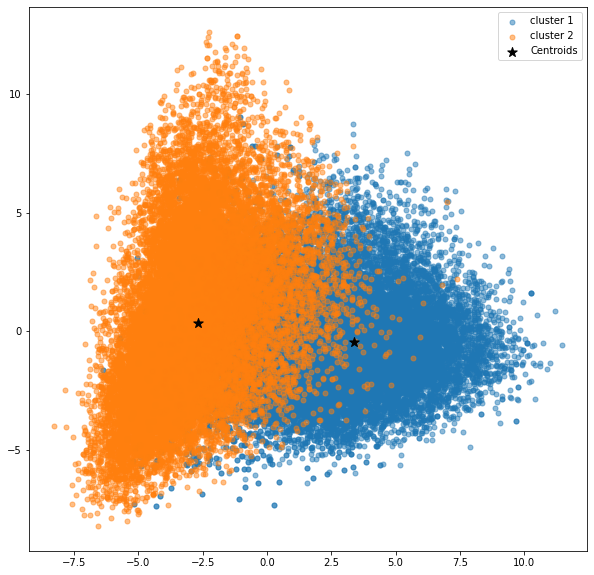

In [ ]:
def print_2d():
  data, centroids = get_data_label(n_components=2)
  plt.figure(figsize=(10,10))
  uniq = np.unique(y)
  for i in uniq:
    plt.scatter(data[y == i , 0] , data[y == i , 1] , label = 'cluster ' + str(i+1), marker = '.', alpha=0.5, s=100)

  # Plotting the Cluster Centroids
  plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k', marker = '*', label = "Centroids")

  plt.legend()
  plt.show()

print_2d()

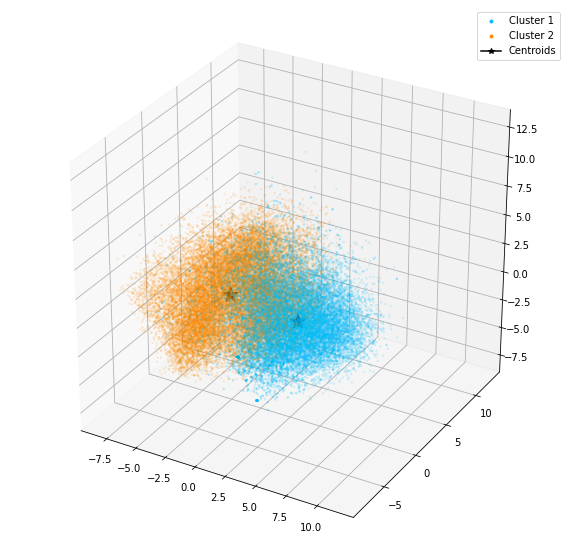

In [ ]:
def print_3d():
  data, centroids = get_data_label(3)
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  x = np.array(data[:,0])
  y = np.array(data[:,1])
  z = np.array(data[:,2])
  cluster = ['Cluster 1', 'Cluster 2']
  colors = ['#00BFFF', '#FF8C00']
  joint_files['c'] = joint_files.label.map({0:colors[0], 1:colors[1]})

  ax.scatter(x,y,z, marker = '.', c=joint_files.c, s=10, alpha=0.1)

  leg = []
  for i, col in enumerate(colors):
    elem = matplotlib.lines.Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), markerfacecolor=col, markersize=5)
    leg.append(elem)

  ax.scatter(centroids[:,0] , centroids[:,1] , centroids[:,2], marker="*", c="black", alpha=1, s=250, label = "Centroids")
  elem = matplotlib.lines.Line2D([0], [0], marker='*', color='black', label='Centroids')
  leg.append(elem)

  plt.legend(handles=leg)


print_3d()

## 4. Performance evaluation (15 points)
### How did our clustering perform against the real labels?

We do have the true lables (fake/real), but we don't know which cluster correspond to which label. Therefore, we check the two options:

*   Define cluster 1 as fake and cluster 2 as real. What is the accuracy?
*   Define cluster 1 as true and cluster 2 as fake. What is the accuracy?

In [ ]:
data, centroids = get_data_label(2)
accuracy = accuracy_score(y, label)
print("accuracy where cluster 1 is fake and cluster 2 is real: ", accuracy)
label = 1 - label
accuracy2 = accuracy_score(y, label)
print("accuracy where cluster 2 is fake and cluster 1 is real: ", accuracy2)


accuracy where cluster 1 is fake and cluster 2 is real:  0.12947124593523096
accuracy where cluster 2 is fake and cluster 1 is real:  0.870528754064769


## 5. Find optimal `k` (20 points)
What is the best k for clustering?

* Cluster using a range of `k` (up to 20) and compare the SSD and the Silhouette values for every k.
* Plot SSD vs. k and Silhouette score vs. k.

Notes:
* You can get the SSD of a clustering using the `inertia_` attribute of the model.
* Silhouette score using `silhouette_score` function from `sklearn.metrics`. This function accept the model and the data.

In [ ]:
# Cluster using a range of k (up to 20) and compare the SSD and the Silhouette values for every k.

sil = []
inertias = []
k_list = [k for k in range(2,21)]

for k in k_list:
  kmeans = KMeans(n_clusters = k, random_state=0)
  predict = kmeans.fit_predict(X_scaled)
  sil.append(silhouette_score(X_scaled, predict, sample_size=300))
  inertias.append(kmeans.inertia_)


In [ ]:
# Plot Silhouette score vs. k
sil_fig = px.line( x=k_list, y=sil, title='Silhouette score vs. k')
sil_fig.show()

# Plot SSD vs. k
ssd_fig = px.line( x=k_list, y=inertias, title='SSD vs. k')
ssd_fig.show()

### 6. What is the optimal k for clustering? (10 points)

* Explain.
* If optimal k!=2 what can be a good explanation for this?

K-means requires k as an input and doesn't learn it from data.
Sometimes domain knowledge and intuition may help to choose the optimal k, but usually that is not the case.
In the cluster-predict methodology, we can evaluate how well the models are performing based on different K clusters since clusters are used in the downstream modeling.
We want that the clustering will:

1. Minimize distances between samples in the same cluster
2. Maximize distances between samples in different clusters

We learn in class two methods to determine which k is the optimal k for clustering:

* **Elbow method:**

  Measures Sum of Squared distances between data points and their assigned clusters' centroids. Then we pick k at the spot where the Sum of Squared distances starts to flatten out and forming an elbow.

* **Silhouette analysis:**

  Determine the degree of separation between clusters.
  For each sample:
  1. Compute the average distance from all data points in the same cluster ($a^i$).
  2. Compute the average distance from all data points in the closest cluster ($b^i$).
  3. Compute the coefficient: $\frac{b^i - a^i}{max(b^i,a^i)}$
  
  The coefficient can take values in the interval [-1, 1].
  * If it is 0 –> the sample is very close to the neighboring clusters.
  * It it is 1 –> the sample is far away from the neighboring clusters.
  * It it is -1 –> the sample is assigned to the wrong clusters.
  
  Therfore, we want the coefficient to be as big as possible and close to 1 to have a good clusters.

**The optimal k for our clustering model:**

***Silhouette score vs. k:*** The prupose is to achieve the highest score for choosing the optimal k. From our results k = 2 achieved the highest value.

***SSD vs. k:*** The prupose is to achieve the smallest sum distances and in at the same time avoid from overfitting - the elbow reflects this. But in our results there is no sharp elbow, which makes it difficult to reach conclusions.  

Following the explanations, if we rely only on the Silhouette score we will choose the optimal k to be 2.
If we look at the two graphs above we will chose optimal k to be 5, since its the second highest value in the Silhouette score, while on the SSD graph we can see a change in the slope compared to k = 2.

**If optimal k!=2 what can be a good explanation for this**

According to the elbow method, as the number of clusters increases it will naturally improve the fit, since there are more parameters to use, but that at some point this is over-fitting.

Silhouette measures the quality of a clustering, it determines how well each object lies within its cluster. if the optimal k!=2 then the quality of 2 clusters and the insights we get from them is not enough.


# 7. PCA then k-means (15 points)
This time, lets try to change the order.
1. Generate TF-IDF 1000 features
2. Run PCA
3. Run k-means
4. Plot 2D and 3D scatter plots
5. Estimate the accuracy according to true labels.
6. Explain how is it compared to the previous approach, where clustering is performed w/o PCA.


In [ ]:
#1
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = joint_files['text']
y = joint_files['label']
X = tfidf_vectorizer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.toarray())

In [ ]:
#2
pca_2 = PCA(n_components=2,random_state = 0)
pca_3 = PCA(n_components=3,random_state = 0)

data_2 = pca_2.fit_transform(X_scaled)
data_3 = pca_3.fit_transform(X_scaled)

In [ ]:
#3
km_2 = KMeans(n_clusters=2, random_state=0)
km_3 = KMeans(n_clusters=2, random_state=0)

label_2 = km_2.fit_predict(data_2)
label_3 = km_3.fit_predict(data_3)

In [ ]:
centroids_2 = km_2.cluster_centers_
centroids_3 = km_3.cluster_centers_

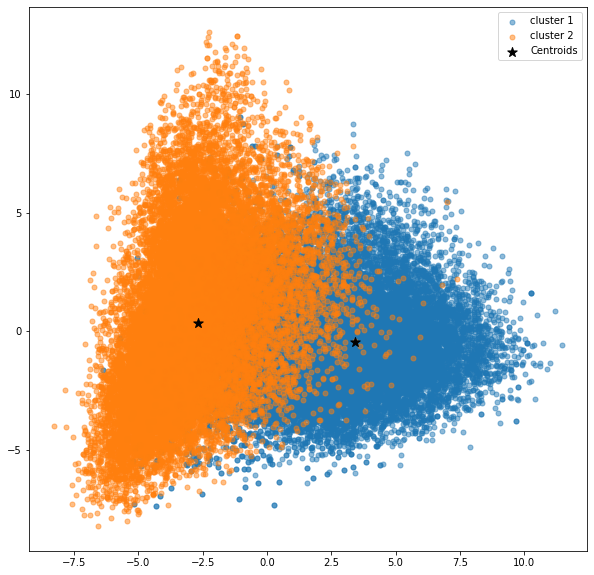

In [ ]:
#4 - 2D
def print_2d():
  plt.figure(figsize=(10,10))
  uniq = np.unique(y)
  for i in uniq:
    plt.scatter(data_2[y == i , 0] , data_2[y == i , 1] , label = 'cluster ' + str(i+1), marker = '.', alpha=0.5, s=100)

  # Plotting the Cluster Centroids
  plt.scatter(centroids_2[:,0] , centroids_2[:,1] , s = 100, color = 'k', marker = '*', label = "Centroids")

  plt.legend()
  plt.show()

print_2d()

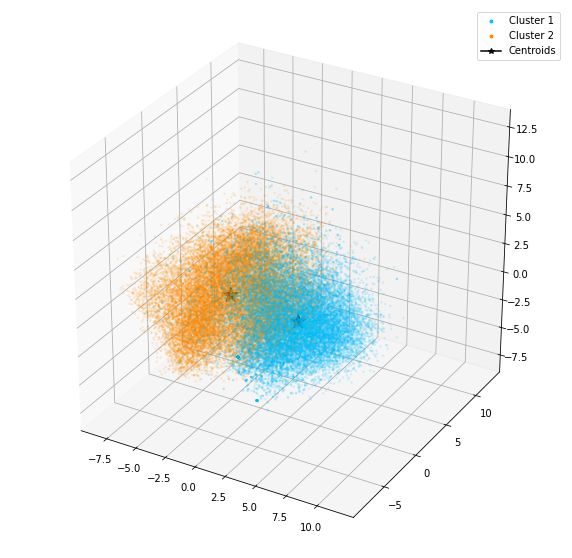

In [ ]:
#4 - 3D
def print_3d():
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  x = np.array(data_3[:,0])
  y = np.array(data_3[:,1])
  z = np.array(data_3[:,2])
  cluster = ['Cluster 1', 'Cluster 2']
  colors = ['#00BFFF', '#FF8C00']
  joint_files['c'] = joint_files.label.map({0:colors[0], 1:colors[1]})

  ax.scatter(x,y,z, marker = '.', c=joint_files.c, s=10, alpha=0.1)

  leg = []
  for i, col in enumerate(colors):
    elem = matplotlib.lines.Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), markerfacecolor=col, markersize=5)
    leg.append(elem)

  ax.scatter(centroids_3[:,0] , centroids_3[:,1] , centroids_3[:,2], marker="*", c="black", alpha=1, s=250, label = "Centroids")
  elem = matplotlib.lines.Line2D([0], [0], marker='*', color='black', label='Centroids')
  leg.append(elem)

  plt.legend(handles=leg)


print_3d()

In [ ]:
#5
print("First PCA keep two components:")
accuracy_2d = accuracy_score(y, label_2)
print("accuracy where cluster 1 is fake and cluster 2 is real: ", accuracy_2d)
label_2 = 1 - label_2
accuracy2_2d = accuracy_score(y, label_2)
print("accuracy where cluster 2 is fake and cluster 1 is real: ", accuracy2_2d)

print("First PCA keep three components:")
accuracy_3d = accuracy_score(y, label_3)
print("accuracy where cluster 1 is fake and cluster 2 is real: ", accuracy_3d)
label_3 = 1 - label_3
accuracy2_3d = accuracy_score(y, label_3)
print("accuracy where cluster 2 is fake and cluster 1 is real: ", accuracy2_3d)

First PCA keep two components:
accuracy where cluster 1 is fake and cluster 2 is real:  0.1348389683282106
accuracy where cluster 2 is fake and cluster 1 is real:  0.8651610316717894
First PCA keep three components:
accuracy where cluster 1 is fake and cluster 2 is real:  0.13506169539845872
accuracy where cluster 2 is fake and cluster 1 is real:  0.8649383046015413


**6 - Explain how is it compared to the previous approach, where clustering is performed w/o PCA**

When we first run PCA:

**If we keep two components**
* The accuracy where cluster 1 is fake and cluster 2 is real is **0.134**.
* The accuracy where cluster 2 is fake and cluster 1 is real is **0.865**.

**If we keep three components**
* The accuracy where cluster 1 is fake and cluster 2 is real is **0.135**.
* The accuracy where cluster 2 is fake and cluster 1 is real is **0.864**.

Without PCA:
* The accuracy where cluster 1 is fake and cluster 2 is real is **0.129**.
* The accuracy where cluster 2 is fake and cluster 1 is real is **0.87**.

It can be seen that there is minimal change in the accuracy of the model when we first run PCA. The fewer components we keep, the greater the change in the accuracy.




# Bonus (10 points)
Redo the same analysis, but this time using the MNIST data set. Notice that this time there are actually 10 'true' clusters.

1. What is the accuracy of the clustering when using k=10?
2. What is the optimal k?
3. How do the results changes if you first run PCA?

**1 - What is the accuracy of the clustering when using k=10**

In [ ]:
# Import MNIST data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Cluster the samples into 2 clusters
km_mnist = KMeans(n_clusters=10, random_state=0)
cluster_labels = km_mnist.fit_predict(x_train)

In [ ]:
#  Associates most probable label with each cluster in KMeans model returns: dictionary of clusters assigned to each label
def retrieve_info(cluster_labels,y_train):

  # Initializing
  reference_labels = {}
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(cluster_labels))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

In [ ]:
reference_labels = retrieve_info(cluster_labels,y_train)
number_labels = np.random.rand(len(cluster_labels))
for i in range(len(cluster_labels)):
  number_labels[i] = reference_labels[cluster_labels[i]]

In [ ]:
# Performance evaluation
accuracy = accuracy_score(number_labels, y_train)
print("Accuracy score: ", accuracy)


Accuracy score:  0.5907166666666667


The accuracy of the clustering when using k=10 is **0.59**.

**2 - What is the optimal k**

In [ ]:
# Cluster using a range of k (up to 20) and compare the SSD and the Silhouette values for every k.

sil = []
inertias = []
K = [k for k in range(2,21)]

for k in K:
  kmeans = MiniBatchKMeans(n_clusters = k, random_state=0)
  labels = kmeans.fit_predict(x_train)
  sil.append(silhouette_score(x_train, labels, sample_size=300))
  inertias.append(kmeans.inertia_)


In [ ]:
# Plot Silhouette score vs. k
mnist_sil_fig = px.line( x=K, y=sil, title='Silhouette score vs. k')
mnist_sil_fig.show()

# Plot SSD vs. k
mnist_ssd_fig = px.line( x=K, y=inertias, title='SSD vs. k')
mnist_ssd_fig.show()

From the graphs above it can be seen that the optimal k according to the Silhouette score is 2 (because it achieved the highest result). The second optimal k is 8 (because it achieved the second highest result).
According to the SSD, it seems that k = 2 achieved a higher result than k = 8. The prupose is to achieve the smallest sum distances and in the same time to avoid from overfitting (where the elbow is).
Therefore, in a combination of the two it is chosen that the optimal k will be 8.

**3 - How do the results changes if you first run PCA**

In [ ]:
# First run PCA
pca_2_d = PCA(n_components=2,random_state = 0)
pca_3_d = PCA(n_components=3,random_state = 0)

after_pca_2_mnist = pca_2_d.fit_transform(x_train)
after_pca_3_mnist = pca_3_d.fit_transform(x_train)


In [ ]:
km_mnist_2 = KMeans(n_clusters = 10, random_state=0)
km_mnist_3 = KMeans(n_clusters = 10, random_state=0)

cluster_labels_2 = km_mnist_2.fit_predict(after_pca_2_mnist)
cluster_labels_3 = km_mnist_3.fit_predict(after_pca_3_mnist)

In [ ]:
reference_labels_2 = retrieve_info(cluster_labels_2,y_train)
number_labels_2 = np.random.rand(len(cluster_labels_2))
for i in range(len(cluster_labels_2)):
  number_labels_2[i] = reference_labels_2[cluster_labels_2[i]]

reference_labels_3 = retrieve_info(cluster_labels_3,y_train)
number_labels_3 = np.random.rand(len(cluster_labels_3))
for i in range(len(cluster_labels_3)):
  number_labels_3[i] = reference_labels_3[cluster_labels_3[i]]

In [ ]:
accuracy_2 = accuracy_score(number_labels_2, y_train)
print("Accuracy score (first PCA keep two components): ", accuracy_2)

accuracy_3 = accuracy_score(number_labels_3, y_train)
print("Accuracy score (first PCA keep three components): ", accuracy_3)


Accuracy score (first PCA keep two components):  0.40741666666666665
Accuracy score (first PCA keep three components):  0.425


When we first run PCA:
* If we keep two components the accuracy is **0.407**
* If we keep three components the accuracy is **0.425**

It can be seen that the PCA had a negative affect on the accuracy of the model. This is because without the PCA the accuracy is **0.59**.